In [1]:
import os
os.getcwd()
os.chdir(r'C:\Temp\SDA')
os.getcwd()

import pandas as pd
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 

C:\Software\Academic\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Dataset
pdf=pd.read_csv('sp500_dataset.csv')
pdf.rename(columns={'Unnamed: 0':'Company'}, inplace = True)
pdf['sector'].replace('Communication Services\n','Communication Services', inplace = True)

industry= pdf.groupby(['sector'])['annual return log', 'Std' ].mean()
industry = industry.reset_index()

featureset = industry[['annual return log']]
feature_mtx = featureset.values 

feature500=pdf[['annual return log','Std']]
feature500_mtx=feature500.values

C:\Software\Academic\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


C:\Software\Academic\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  after removing the cwd from sys.path.
C:\Software\Academic\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


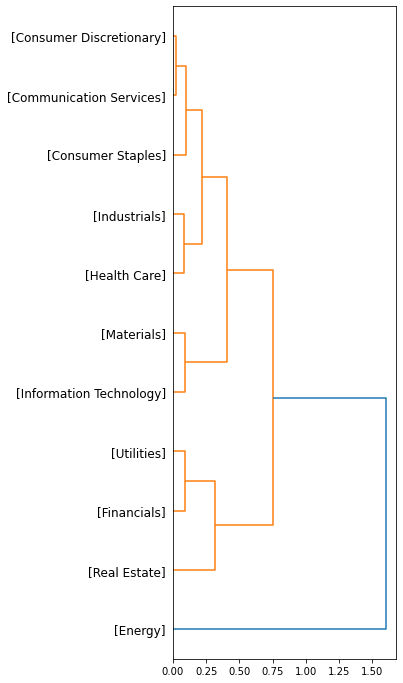

In [3]:
######## Plot1
import scipy
leng = feature_mtx.shape[0]

D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

#plot the denrogram
fig = pylab.figure(figsize=(4, 12))
def llf(id):
    return '[%s]' % ( (str(industry['sector'][id])) )
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

plt.savefig('plot 1.png', bbox_inches = 'tight')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

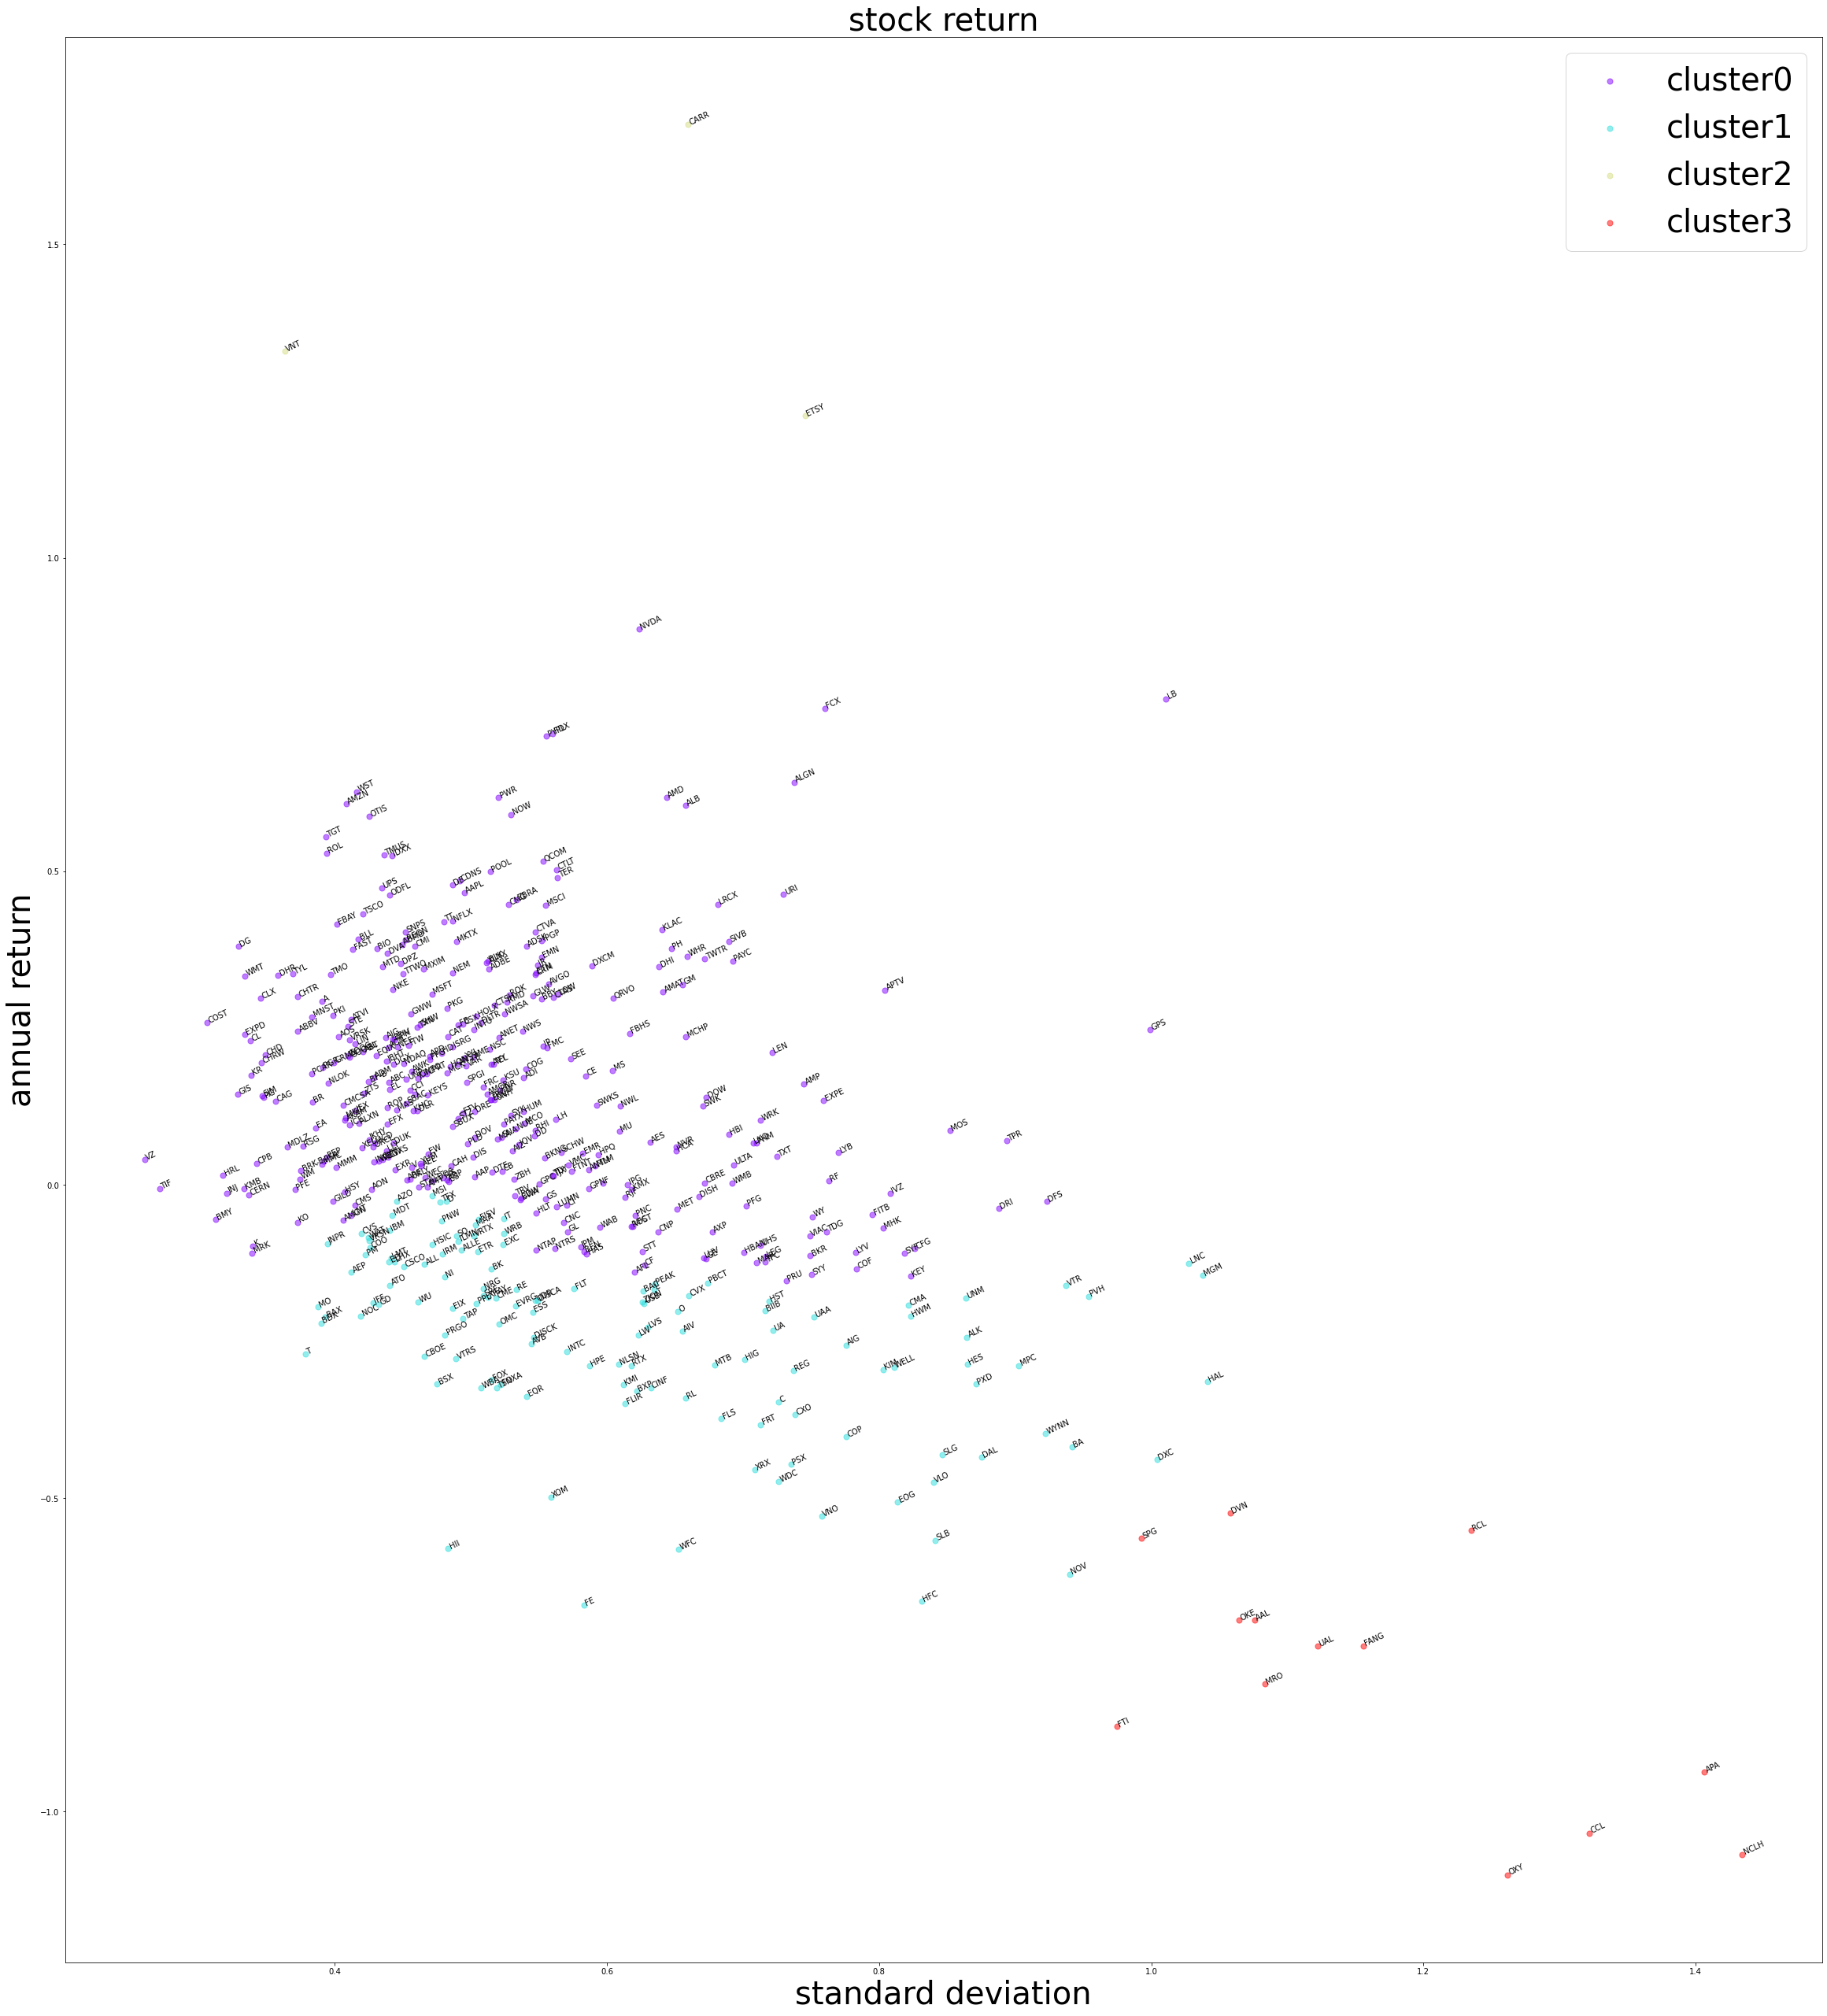

In [4]:
######## Plot2
dist_matrix = distance_matrix(feature500_mtx,feature500_mtx) 
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(feature500_mtx)
agglom.labels_
pdf['cluster_'] = agglom.labels_ 
pdf.head()

import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(40,45))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Std[i], subset['annual return log'][i], str(subset['Company'][i]), rotation=25) 
    plt.scatter(subset['Std'], subset['annual return log'], s= 50, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend(fontsize = 40)
plt.title('stock return',fontsize = 40)
plt.xlabel('standard deviation',fontsize = 40)
plt.ylabel('annual return',fontsize = 40)

plt.savefig('plot 2.png')
plt.show()

C:\Software\Academic\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoi

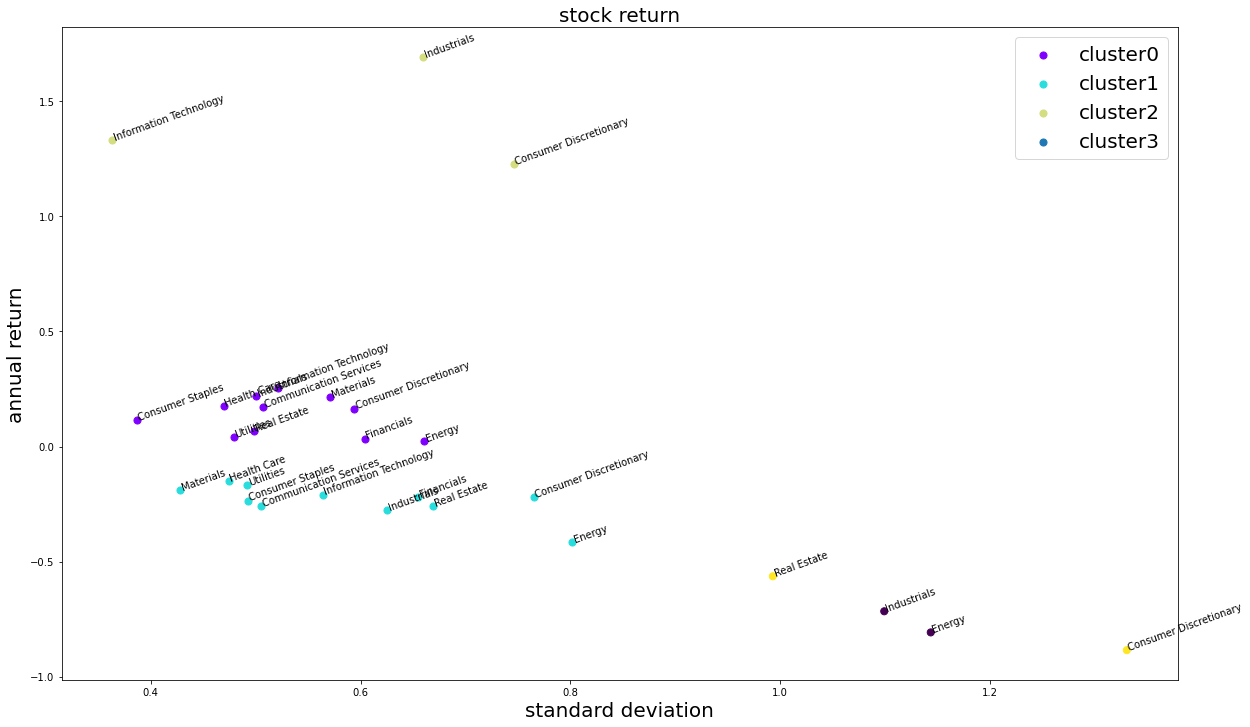

In [5]:
####### Plot3

df2= pdf.groupby(['cluster_', 'sector'])['annual return log', 'Std' ].mean()


plt.figure(figsize=(20,12))
for color, label in zip(colors, cluster_labels):
    subset = df2.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][1], subset.loc[i][0], str(i), rotation=20)
    plt.scatter(subset.Std, subset['annual return log'], s=50, c=color, label='cluster'+str(label))
plt.legend(fontsize = 20)
plt.title('stock return',fontsize = 20)
plt.xlabel('standard deviation',fontsize = 20)
plt.ylabel('annual return',fontsize = 20)

plt.savefig('plot 3.png')
plt.show()